In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_excel('C:/Users/jcoliveira/Desktop/TCC/Projeto/DataBase.xlsx')

In [33]:
y = data.Resultado
x = data.drop(columns = ['Resultado'])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24878, 22), (10662, 22), (24878,), (10662,))

In [35]:
train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

In [36]:
#model = DecisionTreeClassifier(
#    criterion='entropy',         # Usar entropia como critério
#    max_depth=20,                 # Limitar a profundidade máxima a 5
#    min_samples_split=10,        # Dividir nós com no mínimo 10 amostras
#    min_samples_leaf=4,          # As folhas devem ter pelo menos 4 amostras
#    max_features= 1         # Considerar a raiz quadrada do número de features
#)

# Realizar treinamento e calcular acurácia para diferentes profundidades da árvore
max_depths = range(1, 21)
for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    
    # Acurácia no conjunto de treino
    train_accuracy = model.score(x_train, y_train)
    train_accuracies.append(train_accuracy)
    # Acurácia no conjunto de teste
    test_accuracy = model.score(x_test, y_test)
    test_accuracies.append(test_accuracy)
     # Taxa de erro no conjunto de treino
    train_error = 1 - model.score(x_train, y_train)
    train_errors.append(train_error)
    # Taxa de erro no conjunto de teste
    test_error = 1 - model.score(x_test, y_test)
    test_errors.append(test_error)
    
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [37]:
# criterion = 'gini' 'entropy'  - Define a função de medição de qualidade da divisão.
# splitter = 'best'  'random'   - Controla a estratégia usada para dividir cada nó.
# max_depth = 5           		- Define o quão profundo a árvore pode crescer. Valores mais baixos evitam overfitting ao podar a árvore.
# min_samples_split = 10        - Controla quando um nó será dividido. Valores mais altos resultam em árvores menos complexas.
# min_samples_leaf = 4          - Controla o número mínimo de amostras que uma folha (nó final) deve conter.
# max_features= 'auto'          - "auto", "sqrt", "log2" ou um número inteiro. O número máximo de características a serem consideradas ao procurar a melhor divisão.
# random_state = 42             - Se você deseja garantir resultados reprodutíveis defina um valor fixo
# max_leaf_nodes = 1            - Restringe o número de folhas, controlando o tamanho da árvore. Se definido, a árvore crescerá até que atinja esse número de folhas
# min_impurity_decrease =       - Ajuda a controlar o crescimento da árvore, limitando divisões que não reduzem significativamente a impureza
# class_weight = 'balanced'		- Pode ser útil se você estiver lidando com um conjunto de dados desbalanceado, atribuindo mais peso para as classes minoritárias.

In [38]:
predict_resultado = model.predict(x_test)

In [39]:
acuracia = metrics.accuracy_score(y_test, predict_resultado)
print(f"Acurácia: {acuracia * 100:.2f}%\t-\tAC = {acuracia:.3f}") # acuracia = previsões correta / total de amostras

precisao = metrics.precision_score(y_test, predict_resultado, average='binary')  # Para classificação binária
print(f"Precisão: {precisao * 100:.2f}%\t-\tPR = {precisao:.3f}") # precisão = VP / VP + FP

recall = metrics.recall_score(y_test, predict_resultado, average='binary')
print(f"  Recall: {recall * 100:.2f}%\t-\tRC = {recall:.3f}")       # recall = = VP / VP + FN

f1 = metrics.f1_score(y_test, predict_resultado, average='binary')
print(f"F1-Score: {f1 * 100:.2f}%\t-\t F = {f1:.3f}")              # f1 = média harmônica entre a precisão e o recall, equilibrando ambas as métricas

Acurácia: 71.76%	-	AC = 0.718
Precisão: 72.58%	-	PR = 0.726
  Recall: 71.01%	-	RC = 0.710
F1-Score: 71.79%	-	 F = 0.718


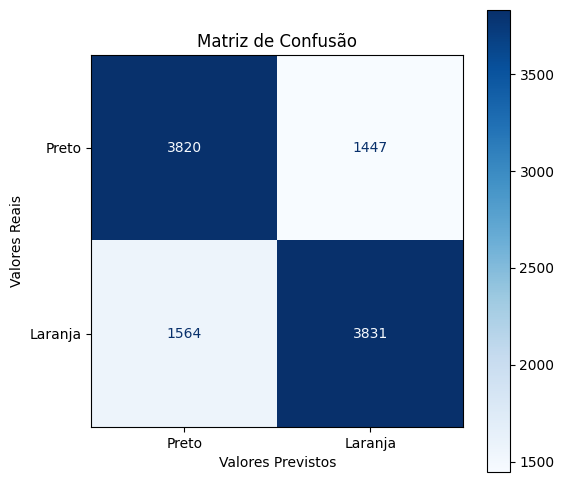

In [40]:
cm = metrics.confusion_matrix(y_test, predict_resultado)
VN, FP, FN, VP = cm.ravel()

# 1º gráfico: Matriz de confusão
plt.figure(figsize=(6, 6))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Preto", "Laranja"])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

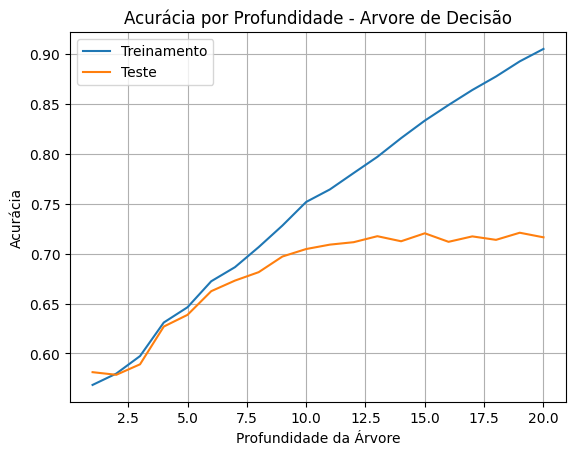

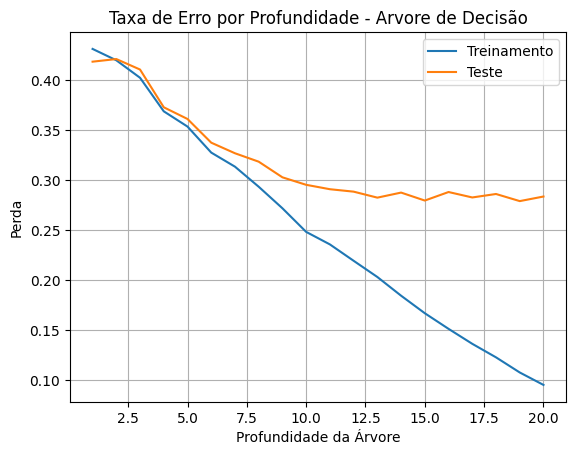

In [41]:
# Plotar a acurácia para o treino e teste
#plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Treinamento')
plt.plot(max_depths, test_accuracies, label='Teste')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Acurácia')
plt.title('Acurácia por Profundidade - Arvore de Decisão')
plt.legend()
plt.grid(True)
plt.show()
# Plotar a taxa de erro para o treino e teste
#plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Treinamento')
plt.plot(max_depths, test_errors, label='Teste')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Perda')
plt.title('Taxa de Erro por Profundidade - Arvore de Decisão')
plt.legend()
plt.grid(True)
plt.show()

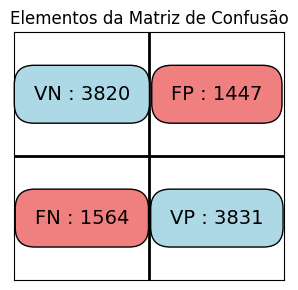

In [42]:
# 2º gráfico: Apresentação de VP, VN, FP, FN em formato de quadrantes
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.text(0.5, 1.5, f'VN : {VN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 1.5, f'FP : {FP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(0.5, 0.5, f'FN : {FN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 0.5, f'VP : {VP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.plot([1, 1], [0, 2], color='black', lw=2)
ax.plot([0, 2], [1, 1], color='black', lw=2)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Elementos da Matriz de Confusão')
plt.tight_layout()
plt.show()